In [1]:
import warnings 
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')
data.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [3]:
data.shape

(32560, 15)

The data reflects that it contains the categorical as well as numerical data having 32561 rows andd 15 columns.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
Age               32560 non-null int64
Workclass         32560 non-null object
Fnlwgt            32560 non-null int64
Education         32560 non-null object
Education_num     32560 non-null int64
Marital_status    32560 non-null object
Occupation        32560 non-null object
Relationship      32560 non-null object
Race              32560 non-null object
Sex               32560 non-null object
Capital_gain      32560 non-null int64
Capital_loss      32560 non-null int64
Hours_per_week    32560 non-null int64
Native_country    32560 non-null object
Income            32560 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


The datset has 6 features having 'int64' data type and rest having 'object' data type.

No null values present in this dataset

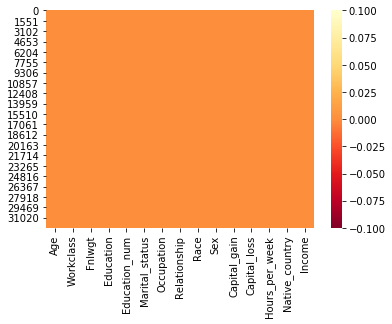

In [5]:
# Visualizing the null values using heatmap.

sns.heatmap(data.isnull(), cmap = 'YlOrRd_r')
plt.show()

#### Statistical Summary 

In [6]:
data.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


OBSERVATIONS :

1. The median of capital-gain and capital-loss is 0.
2. There are outliers present in the dataset as there is huge differrence between the max. value and the 75% value of the variables having continous nature.
3. There is a variety of range among th variables as capital gain is having a high range which shows the huge spread of data.
4. There is a normal distribution ofvariables in the data as the mean is more than the median but there is a slight difference between the two.

#### Checking unique values in Object columns

In [7]:
data.nunique()[data.dtypes==object]

Workclass          9
Education         16
Marital_status     7
Occupation        15
Relationship       6
Race               5
Sex                2
Native_country    42
Income             2
dtype: int64

In [8]:
# Printing object columns
data.select_dtypes(object)

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income
0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
1,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
2,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
3,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
4,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States,<=50K
...,...,...,...,...,...,...,...,...,...
32555,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
32556,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
32557,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
32558,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


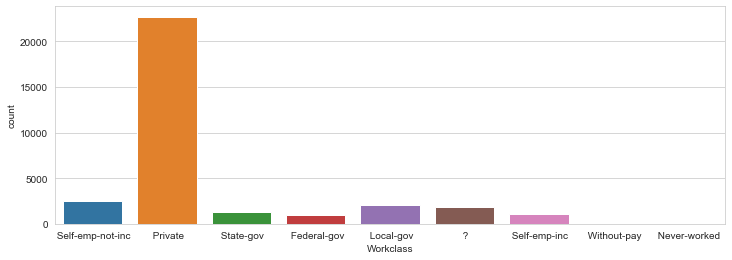

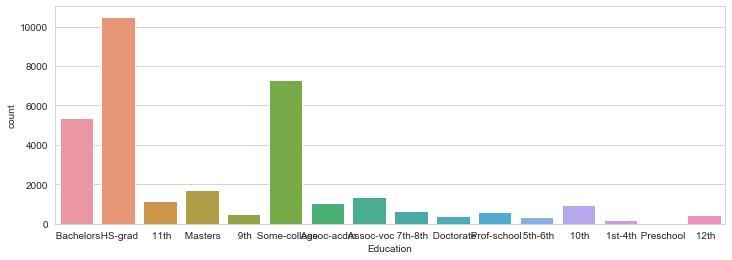

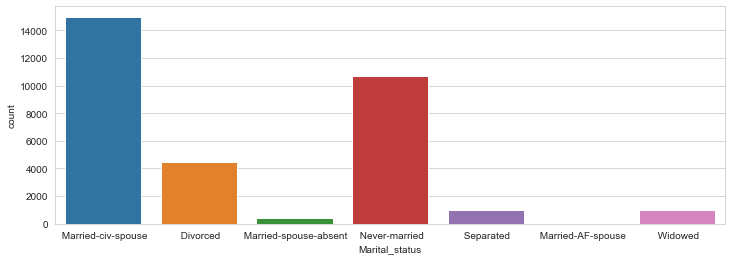

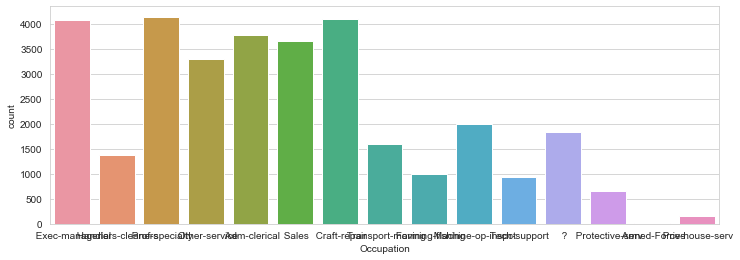

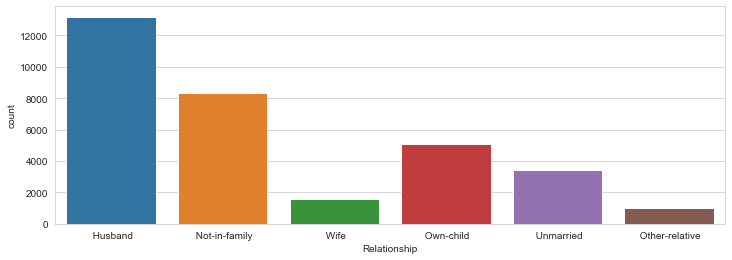

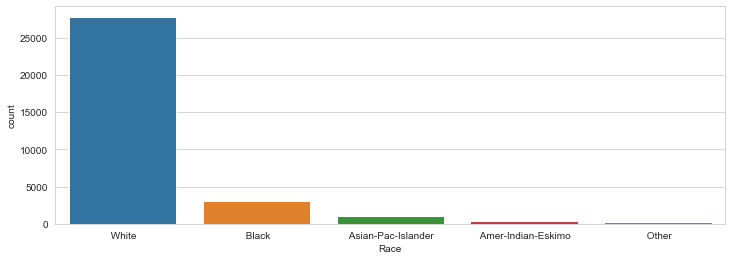

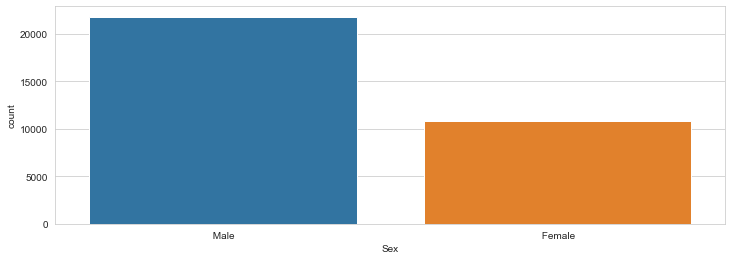

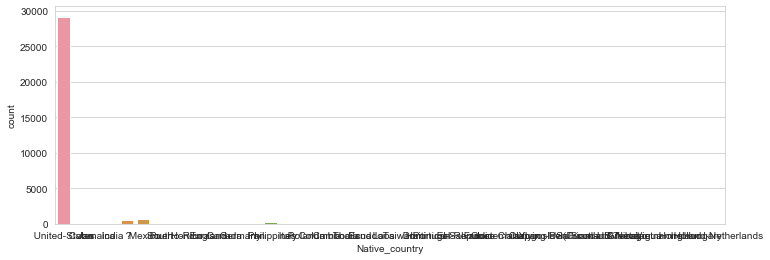

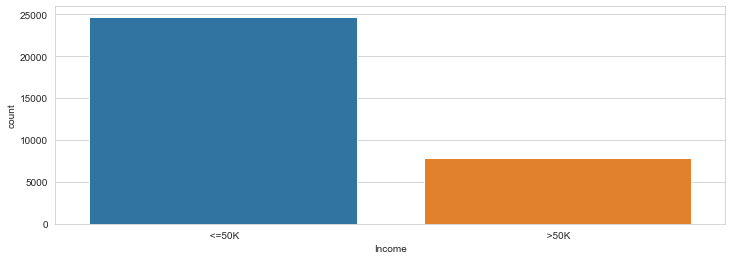

In [10]:
# UNIVARIATE ANALYSIS
# Visualizing the counts of each categorical column/feature.

for col in data.select_dtypes(object).columns:
    sns.set_style('whitegrid')
    plt.figure(figsize=(12,4))
    x = sns.countplot(data[col])
    plt.show()

#### Handling String Values

In [11]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [12]:
for col in data.select_dtypes(object).columns:
    data[col]=lb.fit_transform(data[col])

In [13]:
data.dtypes

Age               int64
Workclass         int32
Fnlwgt            int64
Education         int32
Education_num     int64
Marital_status    int32
Occupation        int32
Relationship      int32
Race              int32
Sex               int32
Capital_gain      int64
Capital_loss      int64
Hours_per_week    int64
Native_country    int32
Income            int32
dtype: object

Handled all object dtypes

In [14]:
data.shape

(32560, 15)

#### Handling Outliers and Skewness

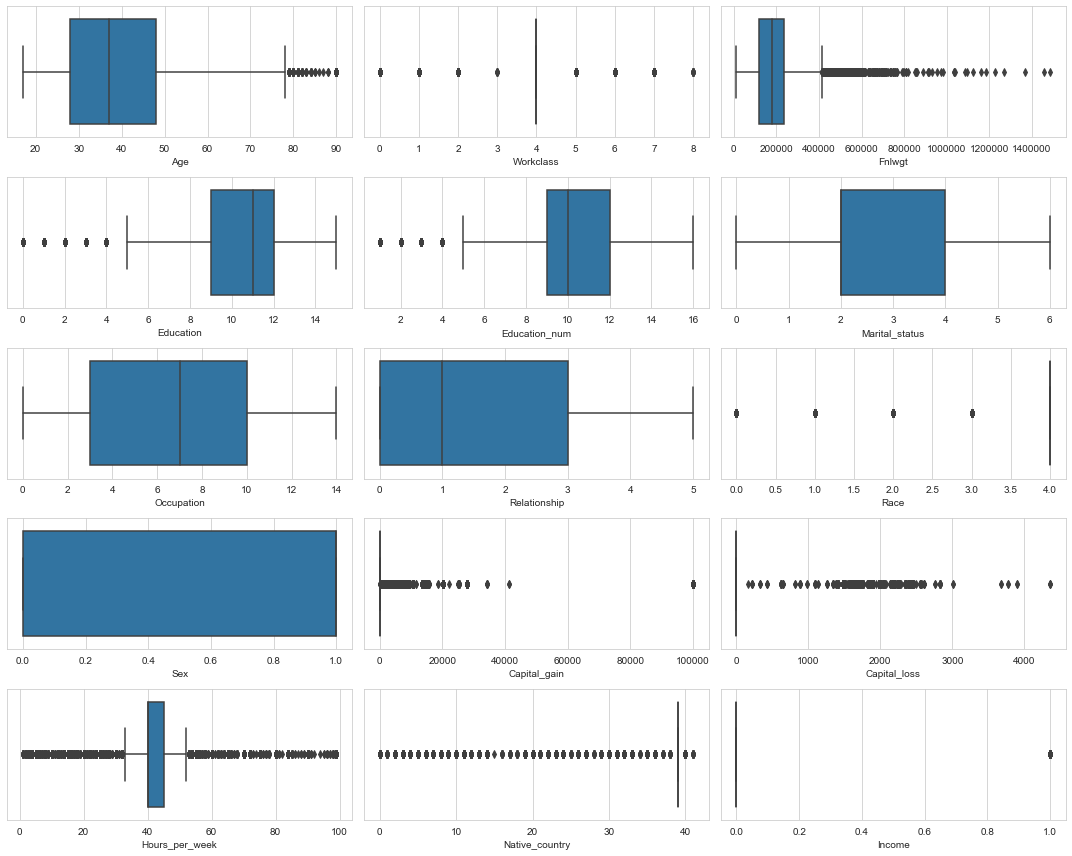

In [16]:
plt.figure(figsize=(15,12))

for x,col in enumerate(data.columns):
    
    plt.subplot(5,3,x+1)
    sns.boxplot(data[col])
    plt.tight_layout()

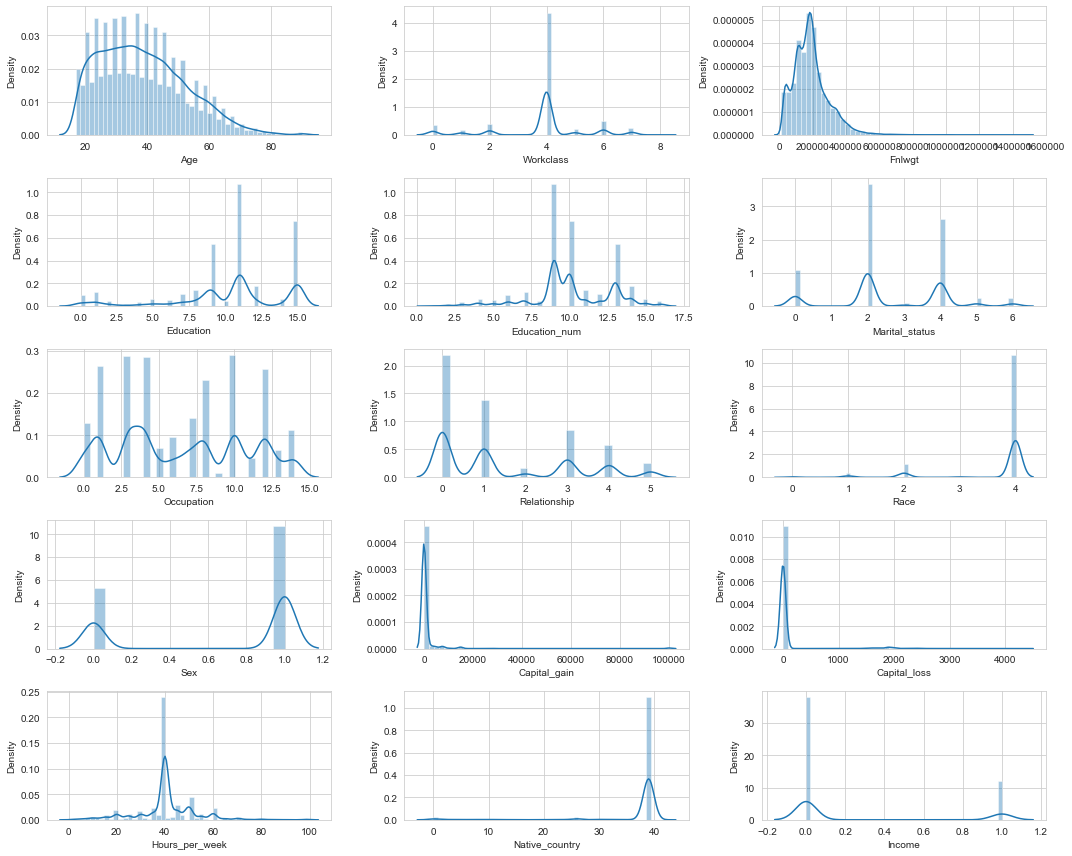

In [17]:
plt.figure(figsize=(15,12))

for x,col in enumerate(data.columns):
    
    plt.subplot(5,3,x+1)
    sns.distplot(data[col])
    plt.tight_layout()

In [18]:
# Let's check the skewness of the data before removing the outliers.

data.skew()

Age                0.558738
Workclass         -0.752280
Fnlwgt             1.446972
Education         -0.934063
Education_num     -0.311630
Marital_status    -0.013448
Occupation         0.114540
Relationship       0.786784
Race              -2.435332
Sex               -0.719244
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
Native_country    -3.658235
Income             1.212383
dtype: float64

Data is somewhat skewed which is needed to be treated

In [19]:
# Let's now check the outliers and clean the data.

from scipy.stats import zscore

z = np.abs(zscore(data))
print(data.shape)

# Removing the outliers.

df_hr = data.loc[(z<3).all(axis=1)]
print(data.shape)

(32560, 15)
(32560, 15)


Now it is not showing as no outliers present.

In [20]:
# Treating the skewness using sqrt function.

for col in data.columns:
    if data.skew().loc[col]>0.55:
        data[col]=np.sqrt(data[col])

So, the skewness has been reduced to it's possible extent.

The cleaning of the data is done. So now, let's move further and do the testing and training of databy splitting the target and rest variables and selecting the best model through various algorithms and evaluation can be done.

#### Splitting data into input and output

In [24]:
# Let's Separating the input and target variables

X = data.drop(columns=["Income"])
y = data[["Income"]]

In [25]:
print(X.shape)
print(y.shape)

(32560, 14)
(32560, 1)


In [26]:
X.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,7.071068,6,288.636450,9,13,2,4,0.000000,4,1,0.0,0.0,13,39
1,6.164414,4,464.377002,11,9,0,6,1.000000,4,1,0.0,0.0,40,39
2,7.280110,4,484.480134,1,7,2,6,0.000000,2,1,0.0,0.0,40,39
3,5.291503,4,581.729318,9,13,2,10,2.236068,2,0,0.0,0.0,40,5
4,6.082763,4,533.462276,12,14,2,4,2.236068,4,0,0.0,0.0,40,39


In [29]:
y=y.astype('int')

In [30]:
# Scaling the Input variables

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[ 0.87717289,  1.46388339, -1.08850574, ..., -0.21987204,
        -2.22212013,  0.29157343],
       [ 0.04529753,  0.09012148,  0.3801927 , ..., -0.21987204,
        -0.03542999,  0.29157343],
       [ 1.06897372,  0.09012148,  0.54819853, ..., -0.21987204,
        -0.03542999,  0.29157343],
       ...,
       [ 1.3769523 ,  0.09012148, -0.24342694, ..., -0.21987204,
        -0.03542999,  0.29157343],
       [-1.30712916,  0.09012148,  0.2506509 , ..., -0.21987204,
        -1.65520046,  0.29157343],
       [ 1.00565793,  0.77700244,  0.98367672, ..., -0.21987204,
        -0.03542999,  0.29157343]])

In [31]:
# Importing the neccesary sklearn libraries.

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, roc_curve,auc, confusion_matrix

In [32]:
# Splitting the training and testing data and finding the maximum accuracy score at best random state.

def m (clf ,X, y):
    max_acc_scr = 0
    for r_state in range(42,101):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = r_state)
        clf.fit(X_train, y_train)
        pred = clf.predict(X_test)
        acc_scr = accuracy_score(pred, y_test)
        if acc_scr > max_acc_scr:
            max_acc_scr = acc_scr
            final_r_state = r_state
    
    print("Maximum Accuracy score is :", max_acc_scr, "achieved at :", final_r_state)
    print("\n")
    print("Classification Report :\n", classification_report(pred, y_test))
    print("\n")
    print("Confusion Matrix :\n", confusion_matrix(pred, y_test))
    print("\n")      
    false_positive_rate, true_positive_rate, threshold = roc_curve(pred, y_test)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print("ROC_AUC_CURVE :", roc_auc)
    print("\n")

In [33]:
# Let's check the accuracy score and other matrices as well as the cross validation score of different algorithms.

print("-------Logistic Regression-------")
lr = LogisticRegression()
r_state = m(lr, X, y)
print("Cross validation score :", cross_val_score(lr, X, y, cv=5, scoring = "accuracy").mean())
print("Standard Deviationscore :", cross_val_score(lr, X, y, cv=5, scoring = "accuracy").std())
print("\n")

print("-------GaussianNB-------")
gnb = GaussianNB()
r_state = m(gnb, X, y)
print("Cross validation score :", cross_val_score(gnb, X, y, cv=5, scoring = "accuracy").mean())
print("Standard Deviationscore :", cross_val_score(gnb, X, y, cv=5, scoring = "accuracy").std())
print("\n")

print("-------DecisionTreeClassifier-------")
dtc = DecisionTreeClassifier()
r_state = m(dtc, X, y)
print("Cross validation score :", cross_val_score(dtc, X, y, cv=5, scoring = "accuracy").mean())
print("Standard Deviationscore :", cross_val_score(dtc, X, y, cv=5, scoring = "accuracy").std())
print("\n")

print("-------SVC-------")
sv = SVC()
r_state = m(sv, X, y)
print("Cross validation score :", cross_val_score(sv, X, y, cv=5, scoring = "accuracy").mean())
print("Standard Deviationscore :", cross_val_score(sv, X, y, cv=5, scoring = "accuracy").std())
print("\n")

print("-------KNeighborsClassifier-------")
knnc = KNeighborsClassifier()
r_state = m(knnc, X, y)
print("Cross validation score :", cross_val_score(knnc, X, y, cv=5, scoring = "accuracy").mean())
print("Standard Deviationscore :", cross_val_score(knnc, X, y, cv=5, scoring = "accuracy").std())
print("\n")

print("-------RandomForestClassifier-------")
rfc = RandomForestClassifier()
r_state = m(rfc, X, y)
print("Cross validation score :", cross_val_score(rfc, X, y, cv=5, scoring = "accuracy").mean())
print("Standard Deviationscore :", cross_val_score(rfc, X, y, cv=5, scoring = "accuracy").std())
print("\n")

print("-------ExtraTreesClassifier-------")
efc = ExtraTreesClassifier()
r_state = m(efc, X, y)
print("Cross validation score :", cross_val_score(efc, X, y, cv=5, scoring = "accuracy").mean())
print("Standard Deviationscore :", cross_val_score(efc, X, y, cv=5, scoring = "accuracy").std())
print("\n")

-------Logistic Regression-------
Maximum Accuracy score is : 0.8419840294840295 achieved at : 83


Classification Report :
               precision    recall  f1-score   support

           0       0.94      0.85      0.89      5413
           1       0.49      0.73      0.59      1099

    accuracy                           0.83      6512
   macro avg       0.72      0.79      0.74      6512
weighted avg       0.86      0.83      0.84      6512



Confusion Matrix :
 [[4593  820]
 [ 298  801]]


ROC_AUC_CURVE : 0.7886786217320988


Cross validation score : 0.8304054054054054
Standard Deviationscore : 0.0024543136393129256


-------GaussianNB-------
Maximum Accuracy score is : 0.8252457002457002 achieved at : 83


Classification Report :
               precision    recall  f1-score   support

           0       0.91      0.86      0.88      5196
           1       0.54      0.66      0.60      1316

    accuracy                           0.82      6512
   macro avg       0.72      0.7

RandomForestClassifier is selected as a model for this dataset as it is giving the best results out of all the algorithms tested, with the accuracy of 0.8670 at 74.

In [34]:
# saving the model using joblib
from sklearn.externals import joblib

# Save the model as a pickle in a file
joblib.dump(rfc, 'rf_cencus_income.pkl')

['rf_cencus_income.pkl']